In [3]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(
                                            path='boston_housing.npz', test_split=0.2, seed=113)

57344/57026 [==============================] - 0s 1us/step


In [11]:
class BostonModel(keras.Model):
    def __init__(self, dense_len=32):
        super().__init__()
        self.dense1 = layers.Dense(dense_len, activation='relu')
        self.dense2 = layers.Dense(dense_len, activation='relu')
        self.dense3 = layers.Dense(1)
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [30]:
model1 = BostonModel(32)
model1.compile(optimizer=keras.optimizers.RMSprop(), #'rmsprop', 
               loss=keras.losses.MeanSquaredError(), #mse
               metrics=['accuracy', 'mse', 'mae'])
history = model1.fit(x_train, y_train, epochs=10, batch_size=32)
# посмотреть history.hisory

Train on 404 samples
Epoch 1/10
404/404 [==============================] - 0s 774us/sample - loss: 15785.2274 - accuracy: 0.0000e+00 - mse: 15785.2285 - mae: 119.3885
Epoch 2/10
404/404 [==============================] - 0s 76us/sample - loss: 2364.6683 - accuracy: 0.0000e+00 - mse: 2364.6682 - mae: 44.8264
Epoch 3/10
404/404 [==============================] - 0s 75us/sample - loss: 372.2786 - accuracy: 0.0000e+00 - mse: 372.2786 - mae: 16.0424
Epoch 4/10
404/404 [==============================] - 0s 89us/sample - loss: 155.4820 - accuracy: 0.0000e+00 - mse: 155.4820 - mae: 9.3776
Epoch 5/10
404/404 [==============================] - 0s 75us/sample - loss: 88.3317 - accuracy: 0.0000e+00 - mse: 88.3317 - mae: 6.6497
Epoch 6/10
404/404 [==============================] - 0s 88us/sample - loss: 79.5505 - accuracy: 0.0000e+00 - mse: 79.5505 - mae: 6.5873
Epoch 7/10
404/404 [==============================] - 0s 77us/sample - loss: 84.2660 - accuracy: 0.0000e+00 - mse: 84.2660 - mae: 6.7121
E

In [33]:
test_loss, test_accuracy, test_mse_score, test_mae_score = model1.evaluate(x_test, y_test)
print(f'test_loss = {test_loss} test_accuracy = {test_accuracy}, test_mse_score = {test_mse_score}, test_mae_score = {test_mae_score}')

102/102 [==============================] - 0s 85us/sample - loss: 73.1291 - accuracy: 0.0000e+00 - mse: 73.1291 - mae: 6.6059
test_loss = 73.1290921977922 test_accuracy = 0.0, test_mse_score = 73.12908935546875, test_mae_score = 6.60585880279541


In [23]:
print(model1.predict(x_test[:2]))
y_test[:2]

[[17.861727]
 [28.71058 ]]


array([ 7.2, 18.8])

In [18]:
model1.summary()

Model: "boston_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  448       
_________________________________________________________________
dense_10 (Dense)             multiple                  1056      
_________________________________________________________________
dense_11 (Dense)             multiple                  33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [60]:
model2 = BostonModel(64)
model2.compile(optimizer=keras.optimizers.RMSprop(), #'rmsprop', 
               loss=keras.losses.MeanSquaredError(), #mse
               metrics=['accuracy', 'mse', 'mae'])
history = model2.fit(x_train, y_train, epochs=10, batch_size=32)
# посмотреть history.hisory

Train on 404 samples
Epoch 1/10
404/404 [==============================] - 0s 748us/sample - loss: 523.6310 - accuracy: 0.0000e+00 - mse: 523.6310 - mae: 21.0055
Epoch 2/10
404/404 [==============================] - 0s 71us/sample - loss: 419.7012 - accuracy: 0.0000e+00 - mse: 419.7012 - mae: 18.4671
Epoch 3/10
404/404 [==============================] - 0s 68us/sample - loss: 311.0439 - accuracy: 0.0000e+00 - mse: 311.0439 - mae: 15.4885
Epoch 4/10
404/404 [==============================] - 0s 83us/sample - loss: 206.4224 - accuracy: 0.0000e+00 - mse: 206.4224 - mae: 12.0350
Epoch 5/10
404/404 [==============================] - 0s 84us/sample - loss: 127.8640 - accuracy: 0.0000e+00 - mse: 127.8640 - mae: 8.9814
Epoch 6/10
404/404 [==============================] - 0s 70us/sample - loss: 79.3408 - accuracy: 0.0000e+00 - mse: 79.3408 - mae: 6.8106
Epoch 7/10
404/404 [==============================] - 0s 84us/sample - loss: 54.6308 - accuracy: 0.0000e+00 - mse: 54.6308 - mae: 5.5342
Epoch

In [61]:
test_loss, test_accuracy, test_mse_score, test_mae_score = model2.evaluate(x_test, y_test)
print(f'test_loss = {test_loss} test_accuracy = {test_accuracy}, test_mse_score = {test_mse_score}, test_mae_score = {test_mae_score}')

102/102 [==============================] - 0s 721us/sample - loss: 24.3038 - accuracy: 0.0000e+00 - mse: 24.3038 - mae: 3.8534
test_loss = 24.30380017149682 test_accuracy = 0.0, test_mse_score = 24.303802490234375, test_mae_score = 3.853358030319214


In [62]:
print(model2.predict(x_test[:2]))
y_test[:2]

[[10.707255]
 [15.805694]]


array([ 7.2, 18.8])

In [56]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train-mean)/std
x_test = (x_test-mean)/std

In [64]:
model3 = BostonModel(64)
model3.compile(optimizer=keras.optimizers.RMSprop(), #'rmsprop', 
               loss=keras.losses.MeanSquaredError(), #mse
               metrics=['accuracy', 'mse', 'mae'])
history = model3.fit(x_train, y_train, epochs=100, verbose = 0, batch_size=32)

test_loss, test_accuracy, test_mse_score, test_mae_score = model3.evaluate(x_test, y_test)
print(f'test_loss = {test_loss} test_accuracy = {test_accuracy}, test_mse_score = {test_mse_score}, test_mae_score = {test_mae_score}')

print(model3.predict(x_test[:2]))
y_test[:2]

102/102 [==============================] - 0s 664us/sample - loss: 16.8340 - accuracy: 0.0000e+00 - mse: 16.8340 - mae: 2.7194
test_loss = 16.834031796922872 test_accuracy = 0.0, test_mse_score = 16.83403205871582, test_mae_score = 2.7194061279296875
[[ 8.759578]
 [18.781746]]


array([ 7.2, 18.8])

In [72]:
import numpy as np

k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
#     model = build_model()
    # Train the model (in silent mode, verbose=0)
#     model.fit(partial_train_data, partial_train_targets,
#               epochs=num_epochs, batch_size=1, verbose=0)

    model = BostonModel(64)
    model.compile(optimizer=keras.optimizers.RMSprop(), #'rmsprop', 
                   loss=keras.losses.MeanSquaredError(), #mse
                   metrics=['mse', 'mae'])
    history = model.fit(partial_train_data, partial_train_targets, 
                        epochs=num_epochs, batch_size=32, verbose=0)
    # Evaluate the model on the validation data
    val_loss, val_mse, val_mae = model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)

print(all_scores)
# [2.3181539, 2.0550964, 2.6995378, 2.678512]

processing fold # 0
101/101 [==============================] - 0s 546us/sample - loss: 6.9707 - mse: 6.9707 - mae: 1.9101
processing fold # 1
101/101 [==============================] - 0s 559us/sample - loss: 10.5405 - mse: 10.5405 - mae: 2.4666
processing fold # 2
101/101 [==============================] - 0s 541us/sample - loss: 13.2079 - mse: 13.2079 - mae: 2.4419
processing fold # 3
101/101 [==============================] - 0s 555us/sample - loss: 12.1589 - mse: 12.1589 - mae: 2.4995
[1.9100963, 2.4665961, 2.441887, 2.4995322]


In [73]:
np.mean(all_scores)

2.3295279

In [93]:
k = 10
num_val_samples = len(x_train) // k
num_epochs = 500
all_mae_histories = []

# не понял при k-fold куда остальные данные девать
# !! на них тестироваться иначе внизу прям точное попадание выводит в predict
x_train =  np.concatenate([x_train, x_test], axis=0)
y_train =  np.concatenate([y_train, y_test], axis=0)

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
#     model = build_model()
    # Train the model (in silent mode, verbose=0)
#     model.fit(partial_train_data, partial_train_targets,
#               epochs=num_epochs, batch_size=1, verbose=0)

    model = BostonModel(64)
    model.compile(optimizer=keras.optimizers.RMSprop(), #'rmsprop', 
                   loss=keras.losses.MeanSquaredError(), #mse
                   metrics=['mse', 'mae'])
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=0)
    # Evaluate the model on the validation data
#     val_loss, val_mse, val_mae = model.evaluate(val_data, val_targets)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

# print(all_mae_histories)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [94]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

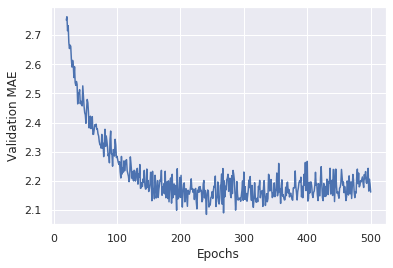

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(range(20, len(average_mae_history) + 1), average_mae_history[19:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [96]:
print(model.predict(x_test[:2]))
y_test[:2]

[[ 7.328915]
 [18.649124]]


array([ 7.2, 18.8])